# Motivos para clientes Inadimplente #

## Descrição do problema ##
  A partir da analise de uma tabela CSV de uma instituição financeira, o objetivo é entender os motivos para um cliente se tornar inadimplente. Para isso será levado em conta algumas informações como salário, escolaridade e movimentação financeira. 


### Dados ###
A tabela CSV utilizada possuí as seguintes informações: 

<table> 
    <tr> <th> Coluna </th> <th> Descrição </th> </tr>
    <tr> <td>id </td> <td> Número da conta</td> </tr>
    <tr> <td>default </td> <td> Indica se o cliente é adimplente(0) ou inadimplente(1) </td> </tr>
    <tr> <td>idade </td> <td> --- </td> </tr>
    <tr> <td>sexo </td> <td> --- </td> </tr>
    <tr> <td>dependentes </td> <td> --- </td> </tr>
    <tr> <td>escolaridade </td> <td> --- </td> </tr>
    <tr> <td>estado_civil </td> <td> --- </td> </tr>
    <tr> <td>salario_anual </td> <td> Faixa do salario mensal multiplicado por 12 </td> </tr>
    <tr> <td>tipo_cartao </td> <td> Categoria do cartão: blue, silver, gold e platinium </td> </tr>
    <tr> <td>meses_de_relacionamento </td> <td> Quantidade de meses desde a abertura da conta </td> </tr>
    <tr> <td>qtd_produtos </td> <td> Quantidade de produtos contratados </td> </tr>
    <tr> <td>iteracoes_12m </td> <td> Quantidade de iterações com o cliente no último ano</td> </tr>
    <tr> <td>meses_inativo_12m </td> <td> Quantidade de meses que o cliente ficou inativo no último ano</td> </tr>
    <tr> <td>limite_credito </td> <td> Valor limite do cartão de crédito </td> </tr>
    <tr> <td>valor_transacoes_12m </td> <td> Soma total do valor das transações no cartão de crédito no último ano</td> </tr>
    <tr> <td>qtd_transacoes_12m </td> <td> Quantidade total de transações no cartão de crédito no último ano</td> </tr>



</table>

## Bibliotecas Importadas ##
* <a href = "https://pandas.pydata.org" >Pandas</a> : Leitura e manipulação de dados.
* <a href = "https://matplotlib.org"> Matplotlib </a>: Visualização gráfica dos dados. 
* <a href = "https://seaborn.pydata.org" > Seaborn </a> :  Complemento para Matplotllib. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Gerando base ##

In [2]:
df = pd.read_csv('../input/material-ebac-inadimplente/Python_M10_support material.csv', na_values =  'na')

In [3]:
df.head(n =  5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


## Exploração de dados ##

### Estrutura ###

In [4]:
df.shape #Quantidade de linhas, quantidade de colunas

(10127, 16)

In [5]:
df[df['default'] == 1]. shape # Linhas contendo os clientes ADIMPLENTES

(1627, 16)

In [6]:
df[df['default'] == 0 ].shape # Linhas contendo os clientes INADIMPLENTES


(8500, 16)

In [7]:
total_linhas, _ = df.shape

total_adimplentes, _ = df[df['default'] == 0].shape
total_inadimplentes, _ = df[df['default'] == 1].shape

print(f'Clientes ADIMPLENTES: {round(100 * total_adimplentes / total_linhas, 2)}%')
print(f'Clientes INADIMPLENTES: {round(100 * total_inadimplentes / total_linhas, 2)}%')

Clientes ADIMPLENTES: 83.93%
Clientes INADIMPLENTES: 16.07%


### Schema  ###

In [8]:
df.head(n = 5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [9]:
df.dtypes #tipos de dados das colunas

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [10]:
df.select_dtypes('object').describe().transpose() 

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [11]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()


,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### Dados Faltantes ###

In [12]:
df.head

<bound method NDFrame.head of               id  default  idade sexo  dependentes         escolaridade  \
0      768805383        0     45    M            3         ensino medio   
1      818770008        0     49    F            5             mestrado   
2      713982108        0     51    M            3             mestrado   
3      769911858        0     40    F            4         ensino medio   
4      709106358        0     40    M            3  sem educacao formal   
...          ...      ...    ...  ...          ...                  ...   
10122  772366833        0     50    M            2             mestrado   
10123  710638233        1     41    M            2                  NaN   
10124  716506083        1     44    F            1         ensino medio   
10125  717406983        1     30    M            2             mestrado   
10126  714337233        1     43    F            2             mestrado   

      estado_civil   salario_anual tipo_cartao  meses_de_relacionamen

In [13]:
df.isna().any() # Estatisticas sobre dados faltantes

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [14]:
#Função para verificar a percent dos dados faltantes. 
def verificar_dados(df: pd.DataFrame) -> None: 
    dados_faltantes = []
    for coluna in df.columns: 
        if df[coluna].isna().any():
            quantidade, _ = df[df[coluna].isna()].shape
            total, _ = df.shape
            dic_dados_faltantes = {coluna: {'quantidade': quantidade, "porcentagem": round(100 * quantidade/total, 2)}}
            dados_faltantes.append(dic_dados_faltantes)
                                                                                            
    for stts in dados_faltantes: 
        print(stts)
   


In [15]:
verificar_dados(df = df)


{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [16]:
 verificar_dados(df = df[df['default'] == 0])
    

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [17]:
 verificar_dados(df = df[df['default'] == 1])


{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


# Transformação e Limpeza dos dados #

## Objetivos: ##
* Corrigir o schema das colunas limite_credito e valor_transacoes_12m; 
* Remover dados faltantes

In [18]:
#Corrigindo Schema
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [19]:
df[['limite_credito', 'valor_transacoes_12m']].head(5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


In [20]:
#função para converter o padrão
func = lambda valor: float(valor.replace('.', '').replace(',', '.'))

#teste da função
valores_iniciais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_finais = list(map(func, valores_iniciais))

print(valores_iniciais)
print(valores_finais)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


In [21]:
#aplicando nas colunas limite_credito e valor_transacoes_12m
df['limite_credito'] = df['limite_credito'].apply(func)

df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(func)

In [22]:
df.dtypes #Consultarse as colunas foram alteradas

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [23]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### Remover dados faltantes ###

In [24]:
df.dropna(inplace = True)

In [25]:
df.shape #O número de linhas foi reduzido de 10127 para 7081

(7081, 16)

In [26]:
df[df['default'] == 0].shape

(5968, 16)

In [27]:
df[df['default'] == 1].shape

(1113, 16)

In [28]:
total_novo, _ = df.shape
total_adimplentes_novo, _ = df[df['default'] == 0].shape
total_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [29]:
print(f'Proporção adimplentes: {round(100 * total_adimplentes / total_linhas, 2)}%')
print(f'Nova proporção adimplentes: {round(100 * total_adimplentes_novo / total_novo, 2)}%')

Proporção adimplentes: 83.93%
Nova proporção adimplentes: 84.28%


In [30]:
print(f'Proporção inadimplentes: {round(100 * total_inadimplentes / total_linhas, 2)}%')
print(f'Nova proporção inadimplentes: {round(100 * total_inadimplentes_novo / total_novo, 2)}%')

Proporção inadimplentes: 16.07%
Nova proporção inadimplentes: 15.72%


# Visualização de Dados #
Após tratados, vamos utilizar gráficos para a visualização desses dados. 

In [31]:
sns.set_style('whitegrid')

In [32]:
df_adimplentes = df[df['default'] == 0]

In [33]:
df_inadimplentes = df[df['default'] == 1]

## Visualização por categoria ##
Os dados serão visualizados criando a relação entre os atributos categóricos e a variável default

In [34]:
df.select_dtypes('object').head(5)


,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


### 1. Escolaridade ###


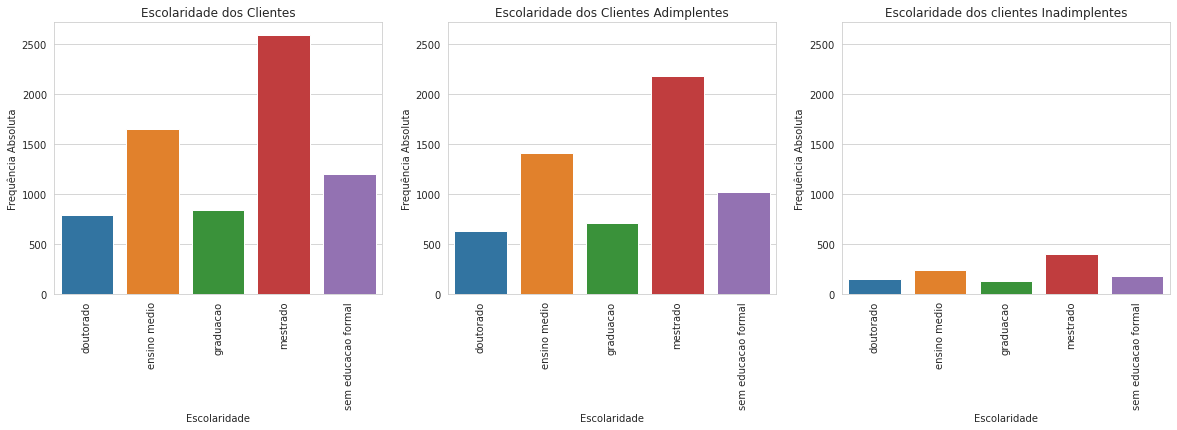

In [35]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos clientes Inadimplentes']

eixo = 0
max_y = 0 
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1
figura, eixos = plt.subplots(1, 3, figsize = (20, 5), sharex = True)

for dataframe in [df, df_adimplentes, df_inadimplentes]:

    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(columns = {coluna: 'frequencia_absoluta'}, inplace = True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.sort_values(by = [coluna], inplace = True)
    df_to_plot.sort_values(by = [coluna])

    f = sns.barplot(x = df_to_plot[coluna], y = df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel = coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels = f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1


figura.show()

### 2. Salário Anual ###

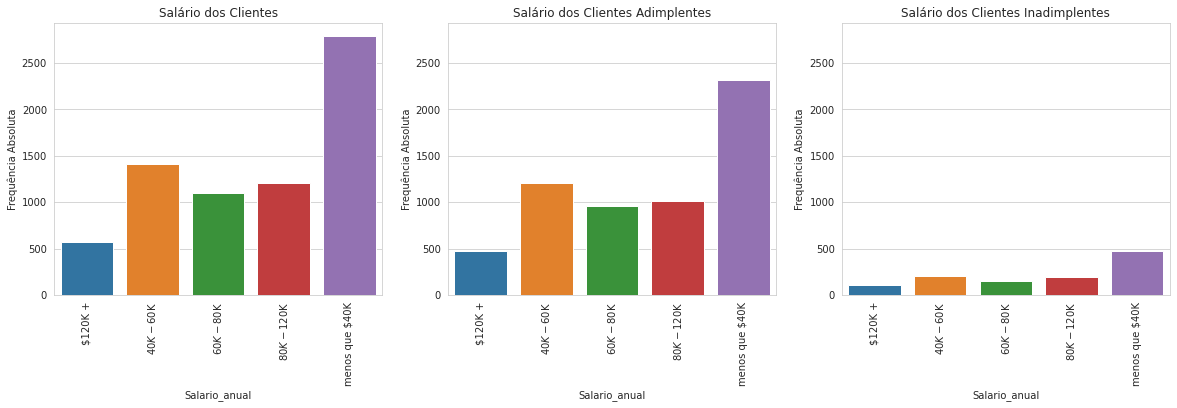

In [36]:
coluna = 'salario_anual'
titulos = ['Salário dos Clientes', 'Salário dos Clientes Adimplentes', 'Salário dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplentes, df_inadimplentes]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns = {coluna: 'frequencia_absoluta'}, inplace = True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace = True, drop = True)
  df_to_plot.sort_values(by = [coluna], inplace = True)

  f = sns.barplot(x = df_to_plot[coluna], y = df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title = titulos[eixo], xlabel = coluna.capitalize(), ylabel = 'Frequência Absoluta')
  f.set_xticklabels(labels = f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim = (0, max_y))
  eixo += 1

figura.show()

### 3. Tipo do Cartão ###

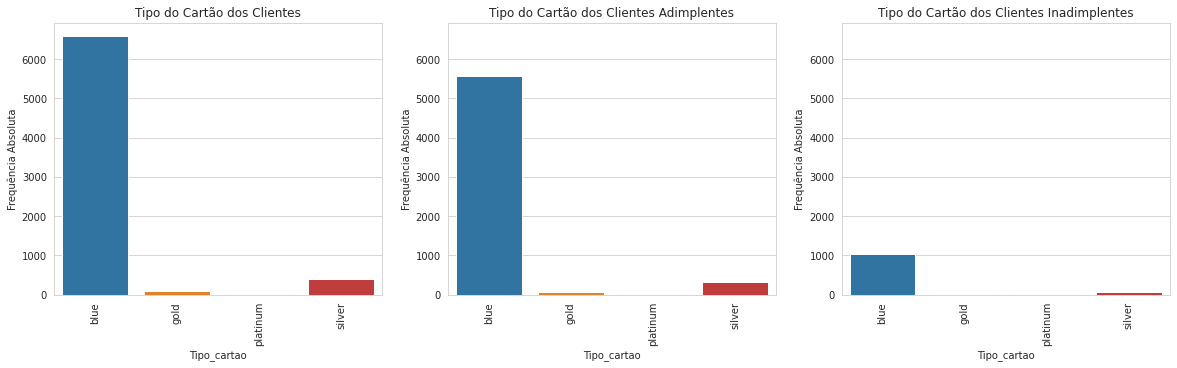

In [37]:
coluna = 'tipo_cartao'
titulos = ['Tipo do Cartão dos Clientes', 'Tipo do Cartão dos Clientes Adimplentes', 'Tipo do Cartão dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplentes, df_inadimplentes]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns = {coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace = True, drop = True)
  df_to_plot.sort_values(by = [coluna], inplace = True)

  f = sns.barplot(x = df_to_plot[coluna], y = df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title = titulos[eixo], xlabel = coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels = f.get_xticklabels(), rotation = 90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim = (0, max_y))
  eixo += 1

figura.show()

## Visualização Numérica ##
A visualização será feita entre atributos numéricos e a varivel default.

In [38]:
df.drop(['id', 'default'], axis = 1).select_dtypes('number').head(5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


### 1. Transações nos últimos 12 meses ###

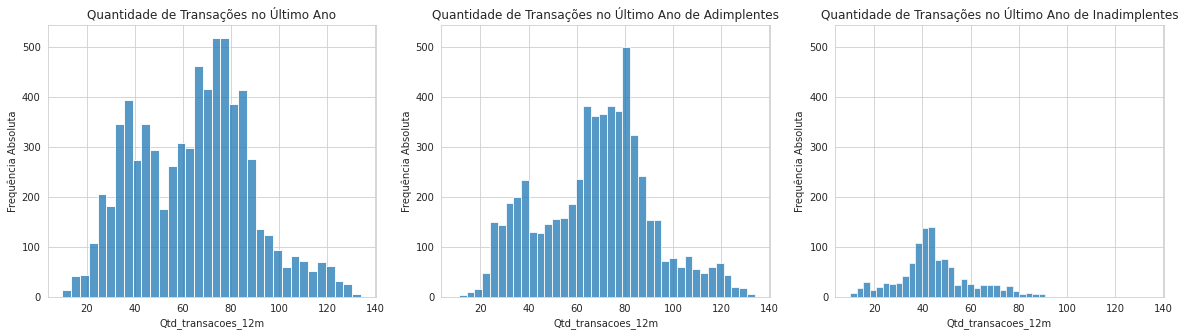

In [39]:
coluna = 'qtd_transacoes_12m'
titulos = ['Quantidade de Transações no Último Ano', 'Quantidade de Transações no Último Ano de Adimplentes', 'Quantidade de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize = (20, 5), sharex = True)

for dataframe in [df, df_adimplentes, df_inadimplentes]:

  f = sns.histplot(x = coluna, data = dataframe, stat = 'count', ax = eixos[eixo])
  f.set(title = titulos[eixo], xlabel = coluna.capitalize(), ylabel = 'Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim = (0, max_y))

  eixo += 1

figura.show()

### 2. Valor das transações nos últimos 12 meses ###

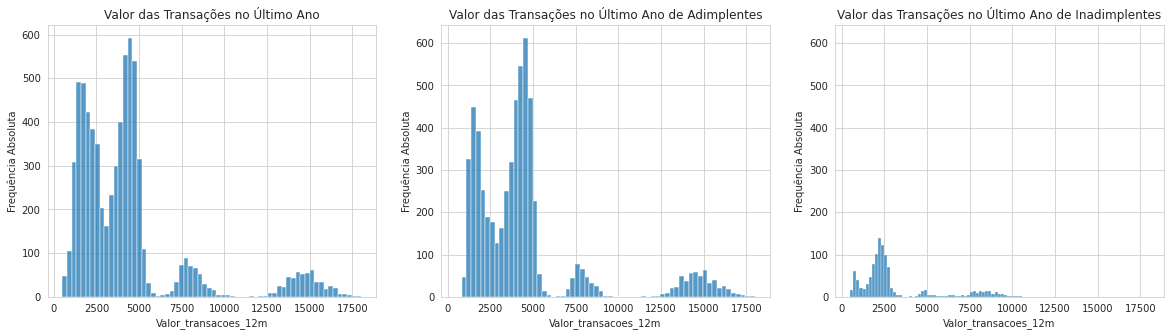

In [40]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplentes, df_inadimplentes]:

  f = sns.histplot(x = coluna, data = dataframe, stat='count', ax = eixos[eixo])
  f.set(title = titulos[eixo], xlabel = coluna.capitalize(), ylabel = 'Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()


### 3. Valor das transações nos últimos 12 meses X Transaçõe nos últimos 12 meses ###

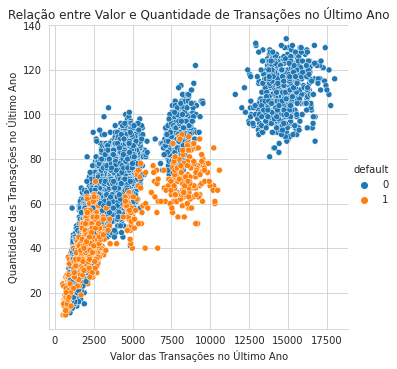

In [41]:
f = sns.relplot(x = 'valor_transacoes_12m', y = 'qtd_transacoes_12m', data = df, hue = 'default')
_ = f.set(
    title ='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel ='Valor das Transações no Último Ano', 
    ylabel ='Quantidade das Transações no Último Ano'
  )

# Insights #
### Atributos Categóricos ###
É possível concluir que não existe uma relação entre a inadimplencia dos clientes com seus atributos categóricos, escolaridade, salário anual e tipo de cartão, já que foi obtido o mesmo resultado para as três bases. 

### Atributos Numéricos ###
Os atributos númericos possuem relações entre suas bases e a inadimplencia. É possível notar que os clientes inadimplentes ocupam, majoritariamente, uma faixa de 40 transações, isso pode ser visto no terceiro gráfico (Quantidade de Transações no Último Ano de Inadimplentes) do primeiro tópico (Transações nos últimos 12 meses).
Já no segundo tópico (Valor das transações nos últimos 12 meses) é possível notar que os clientes inadimplentes ocupam, em sua maioria, a faixa de 2500 no valor das transações, podemos observar isso no terceiro gráfico (Valor das Transações no Último Ano de Inadimplentes).
Por fim, ao juntar as duas colunas (Valor das transações nos últimos 12 meses e Transaçõe nos últimos 12 meses), é possível ver onde há uma concentração maior na porcentagem dos inadimplentes, cor laranja. E ao observar, nota-se que são nos momentos  já destacados nos outros gráficos.

### Conclusão ###
É possível concluir, portanto, que os clientes que apresentam menos chances de se tornarem inadimplentes são aqueles com maior poder e atividade financeira.